In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

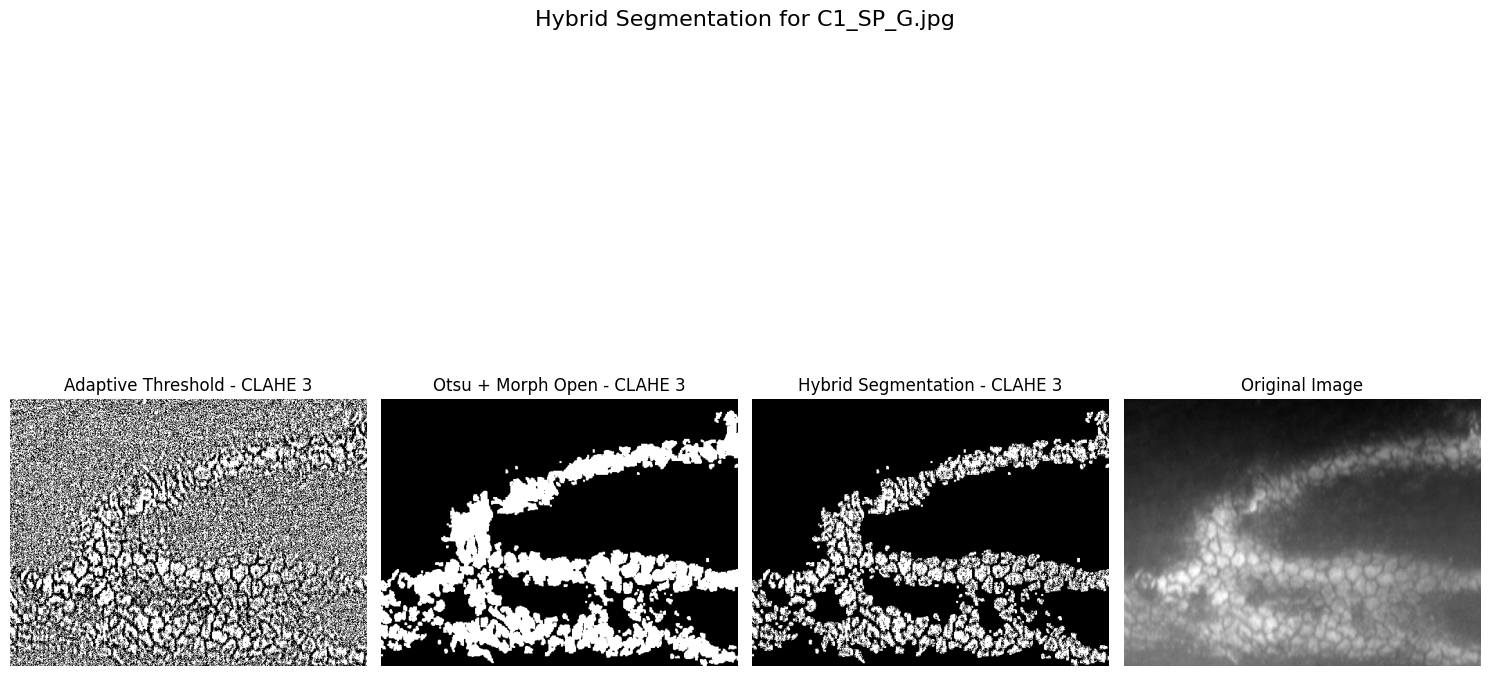

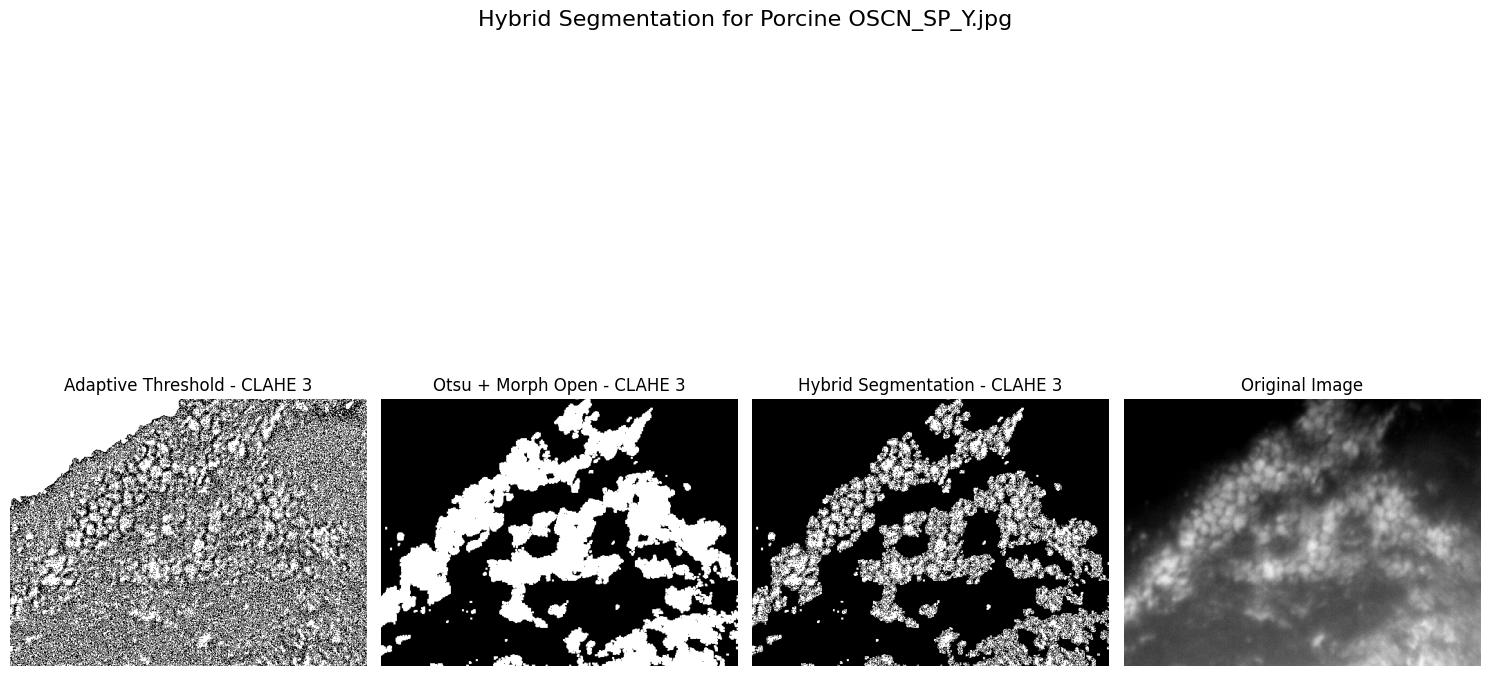

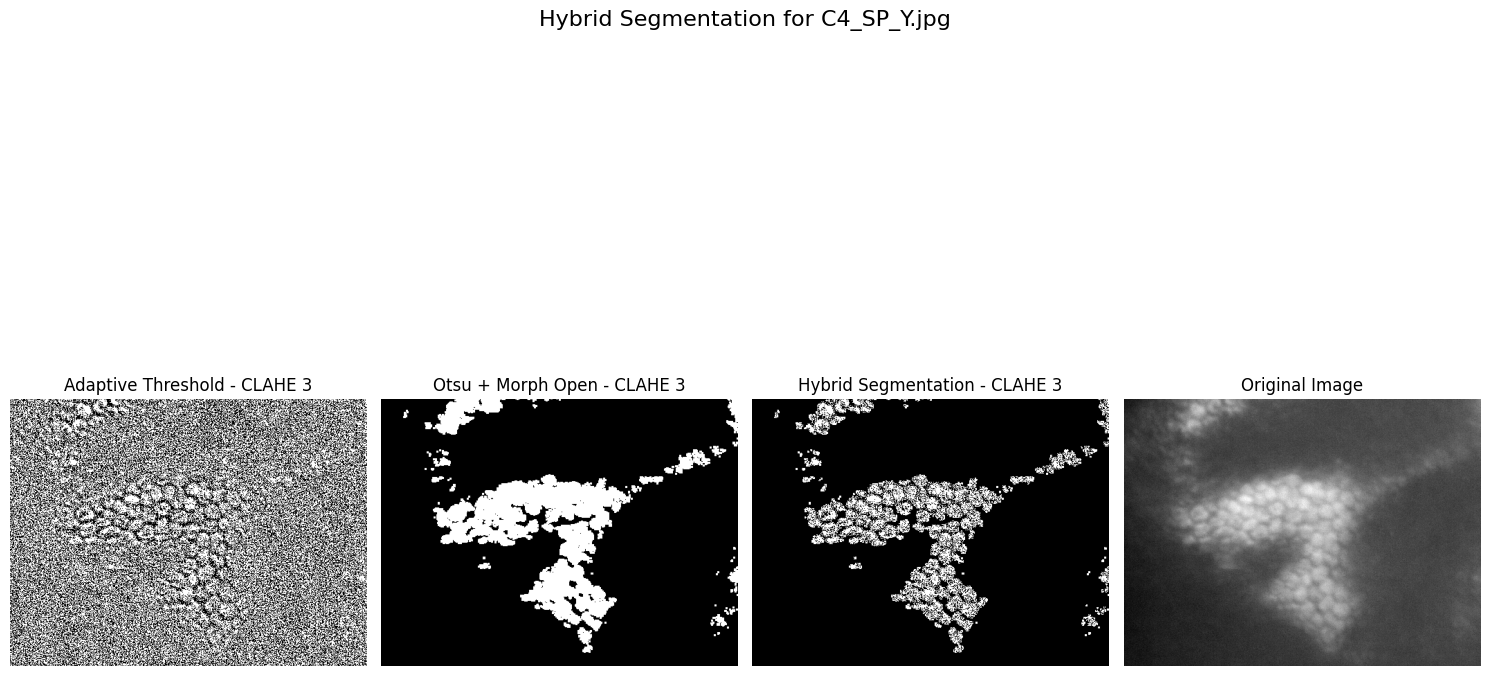

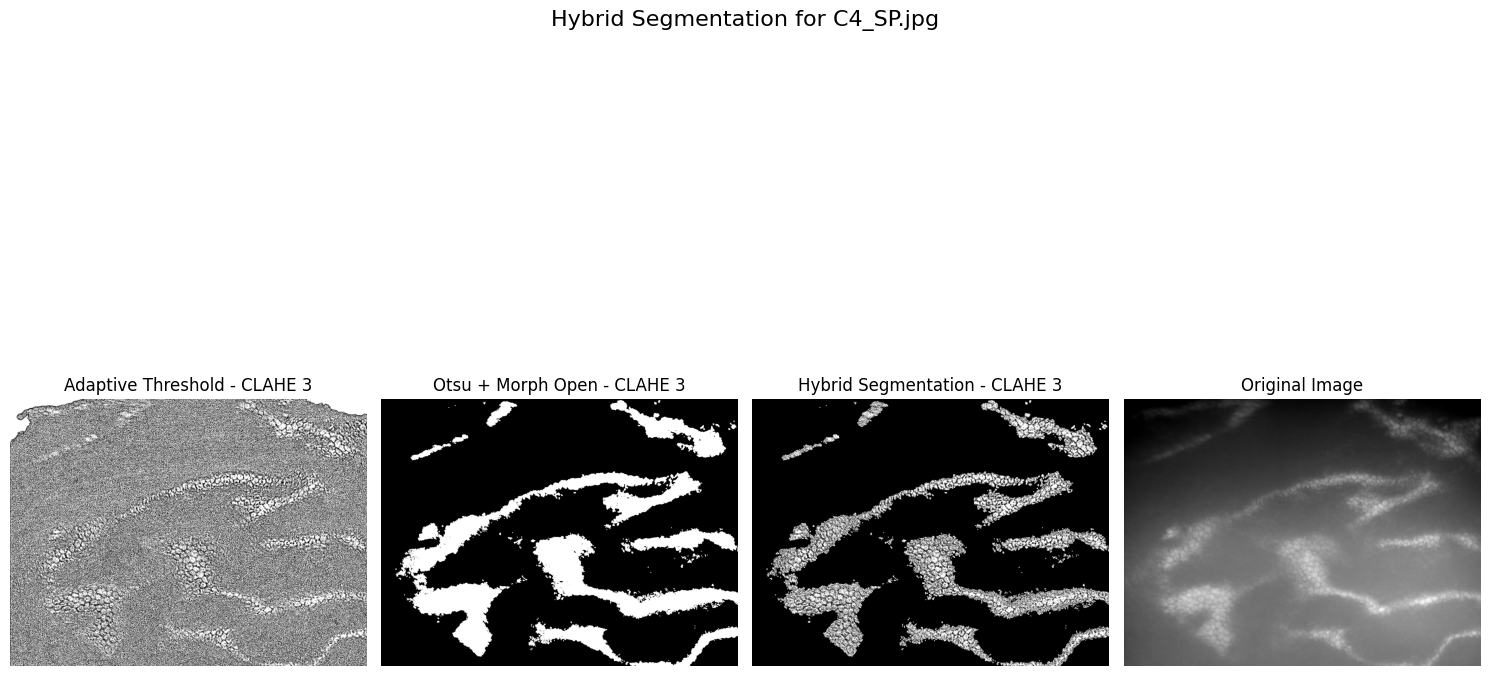

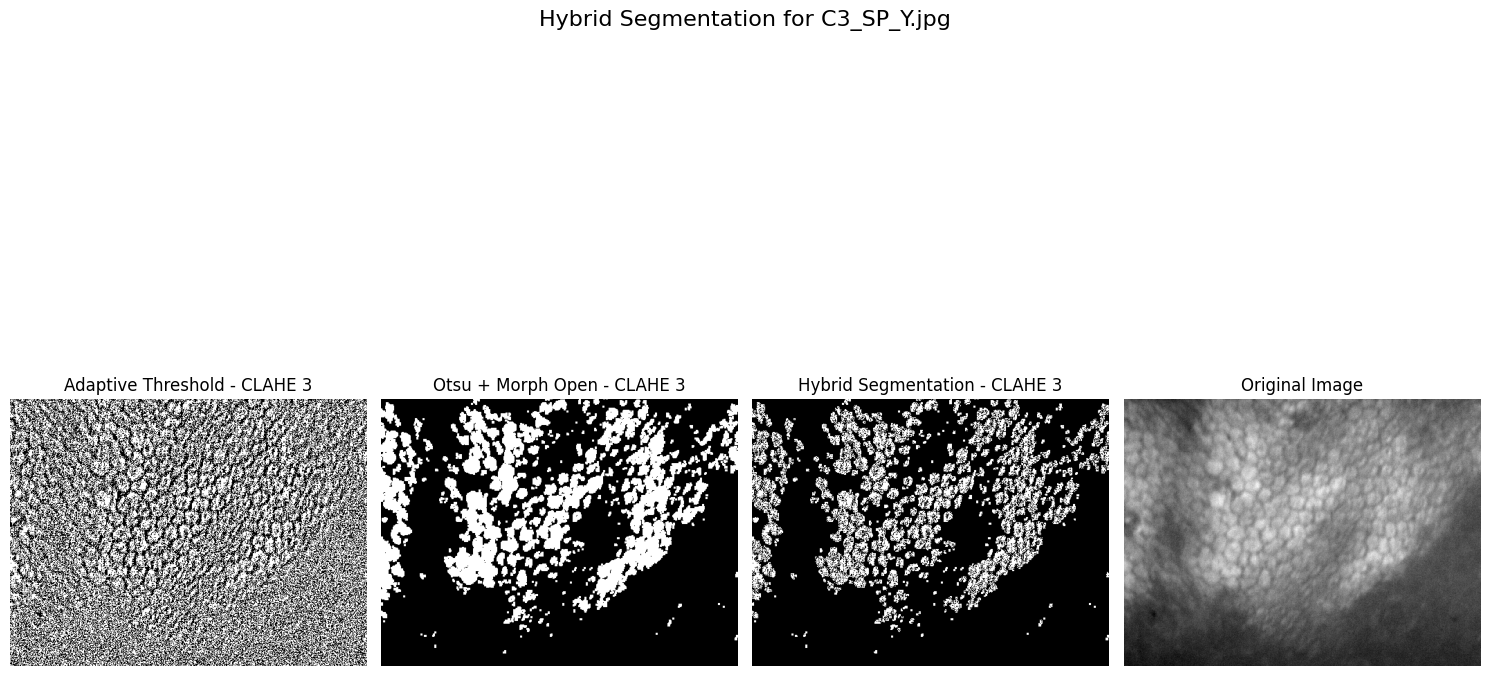

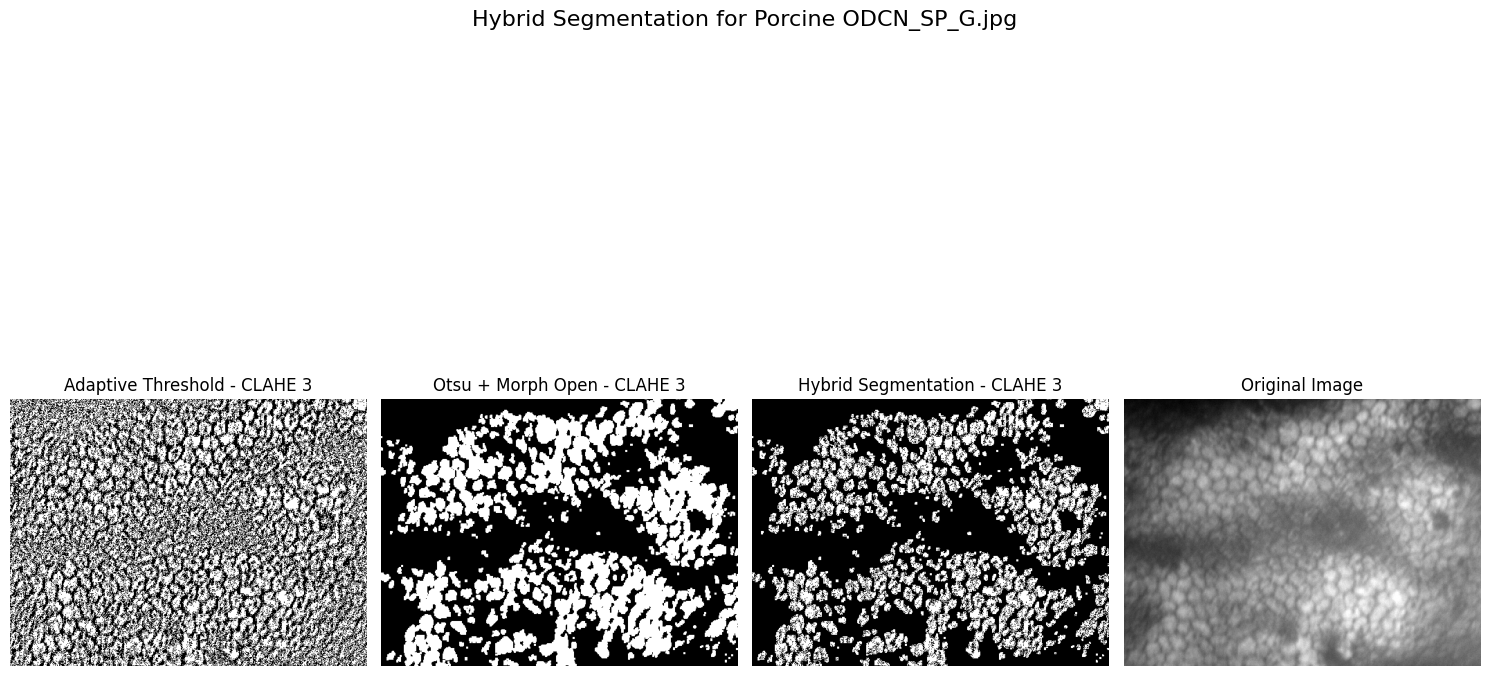

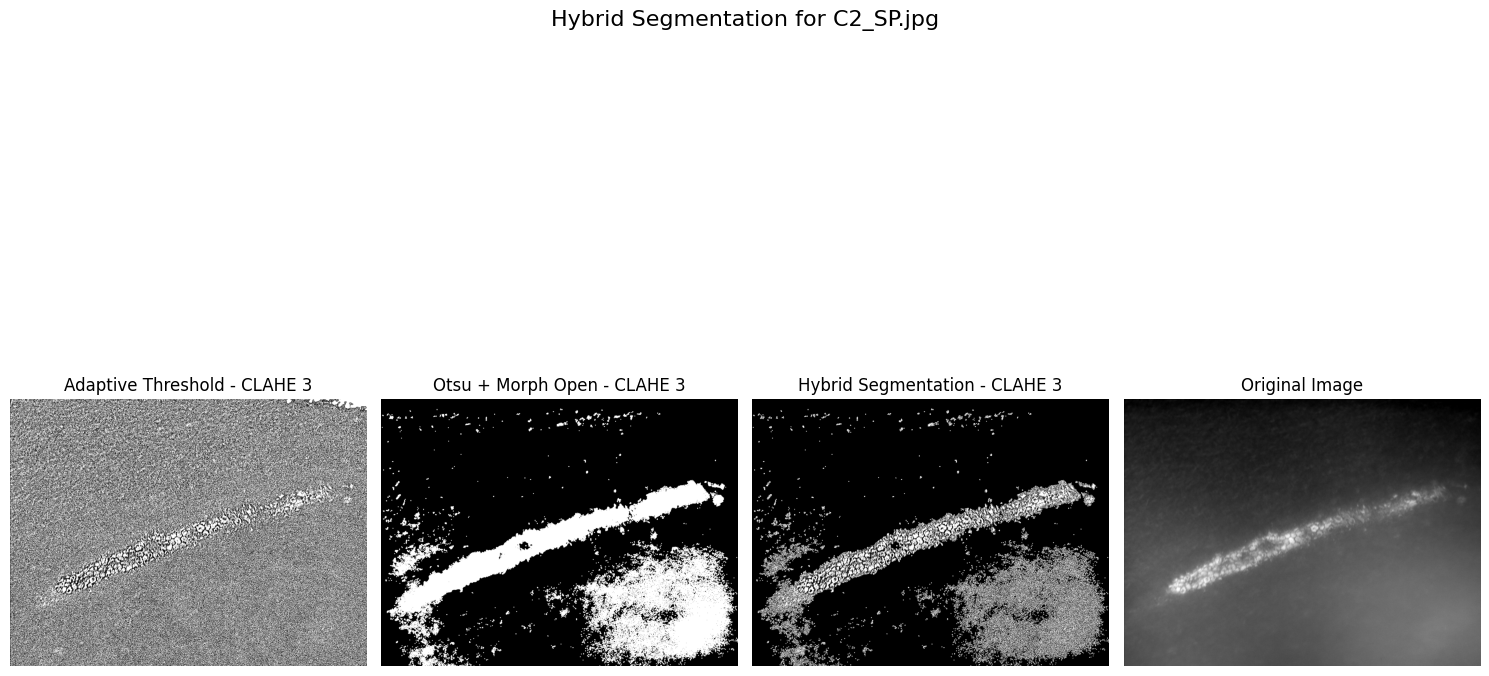

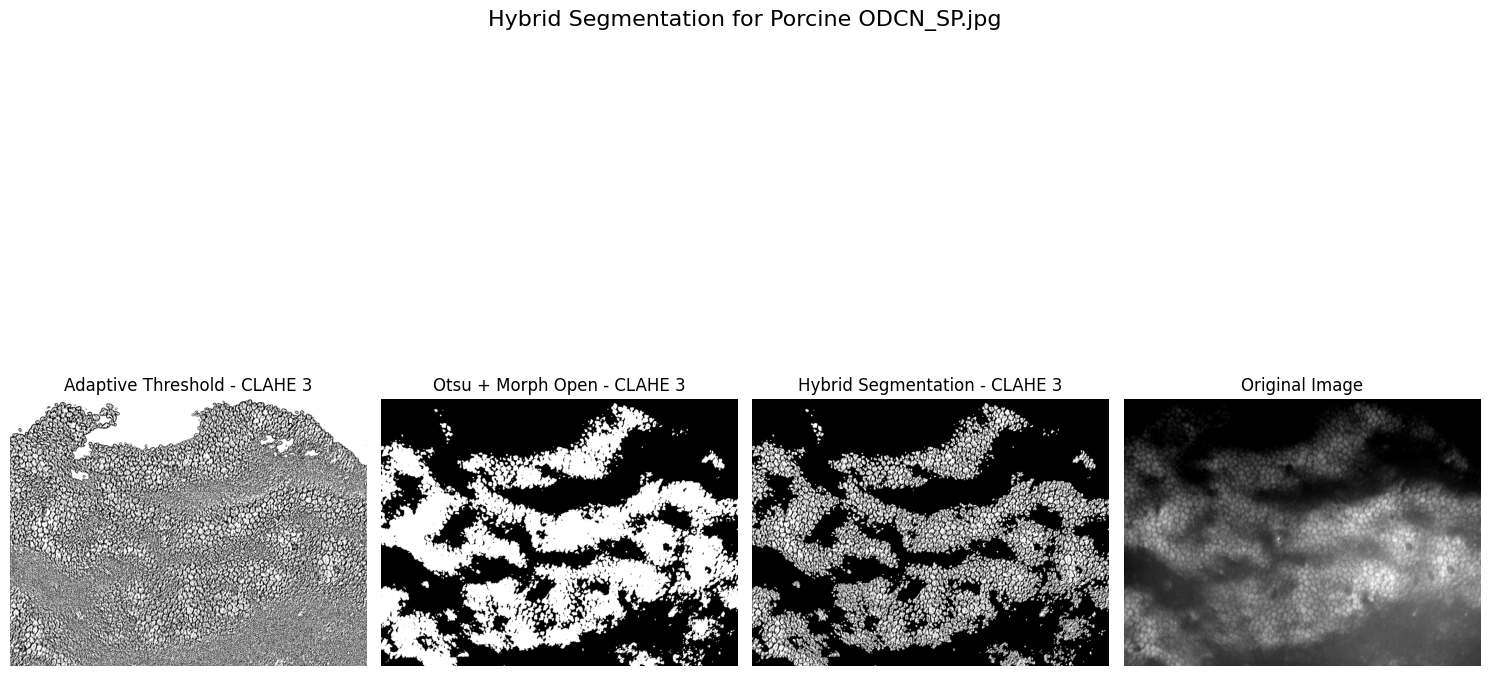

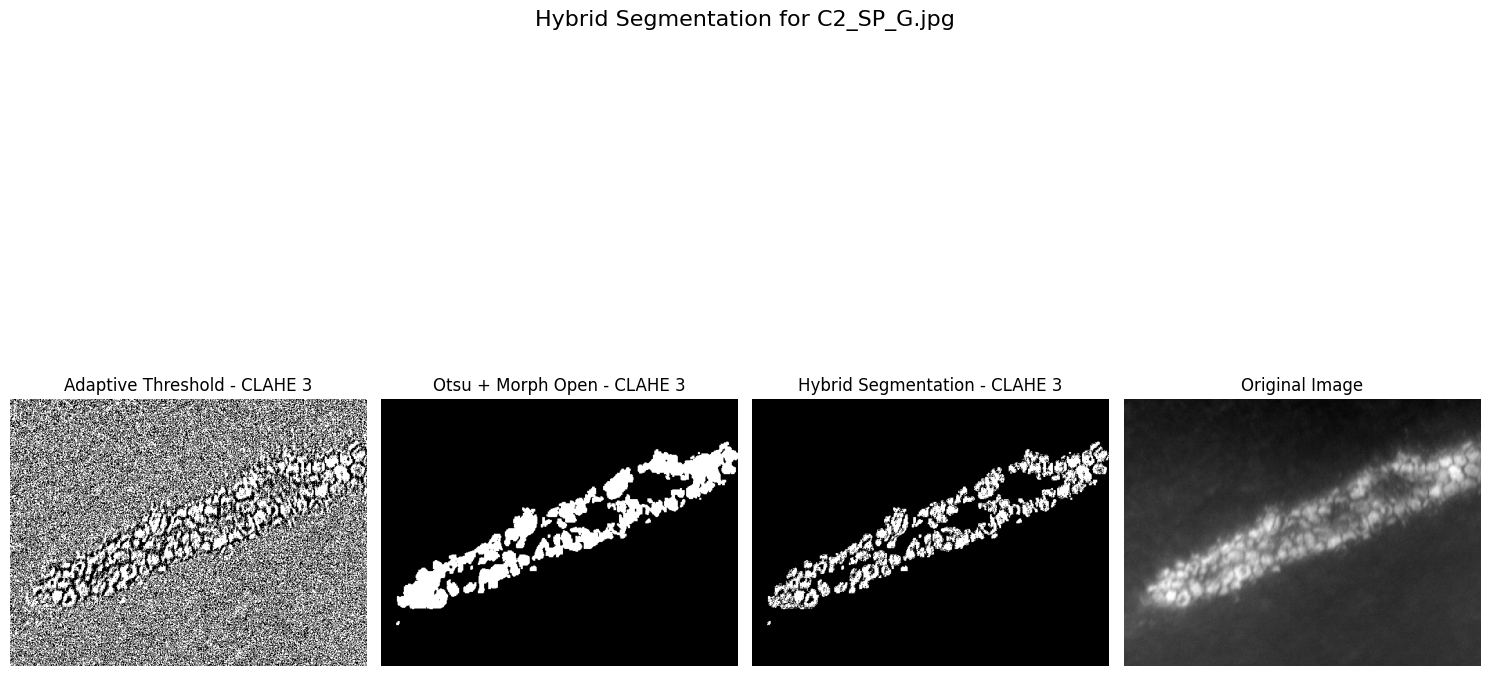

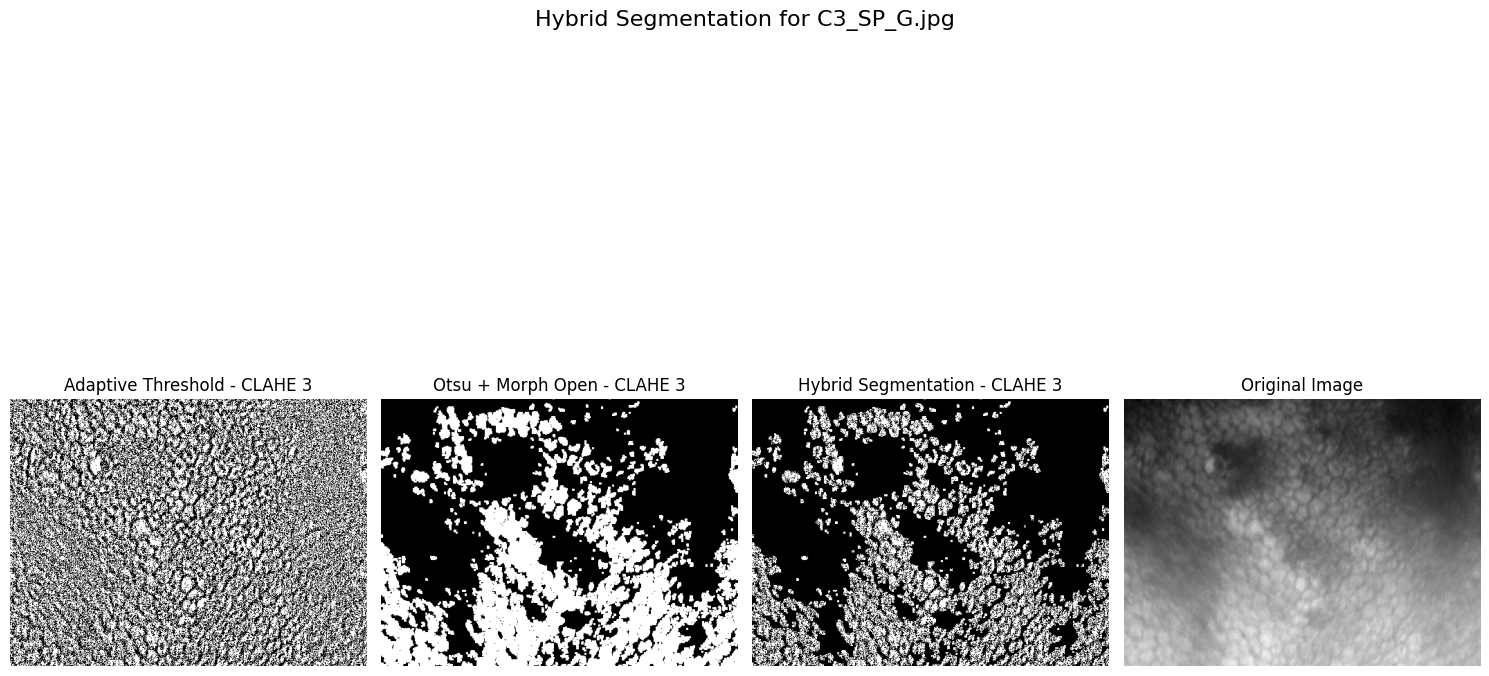

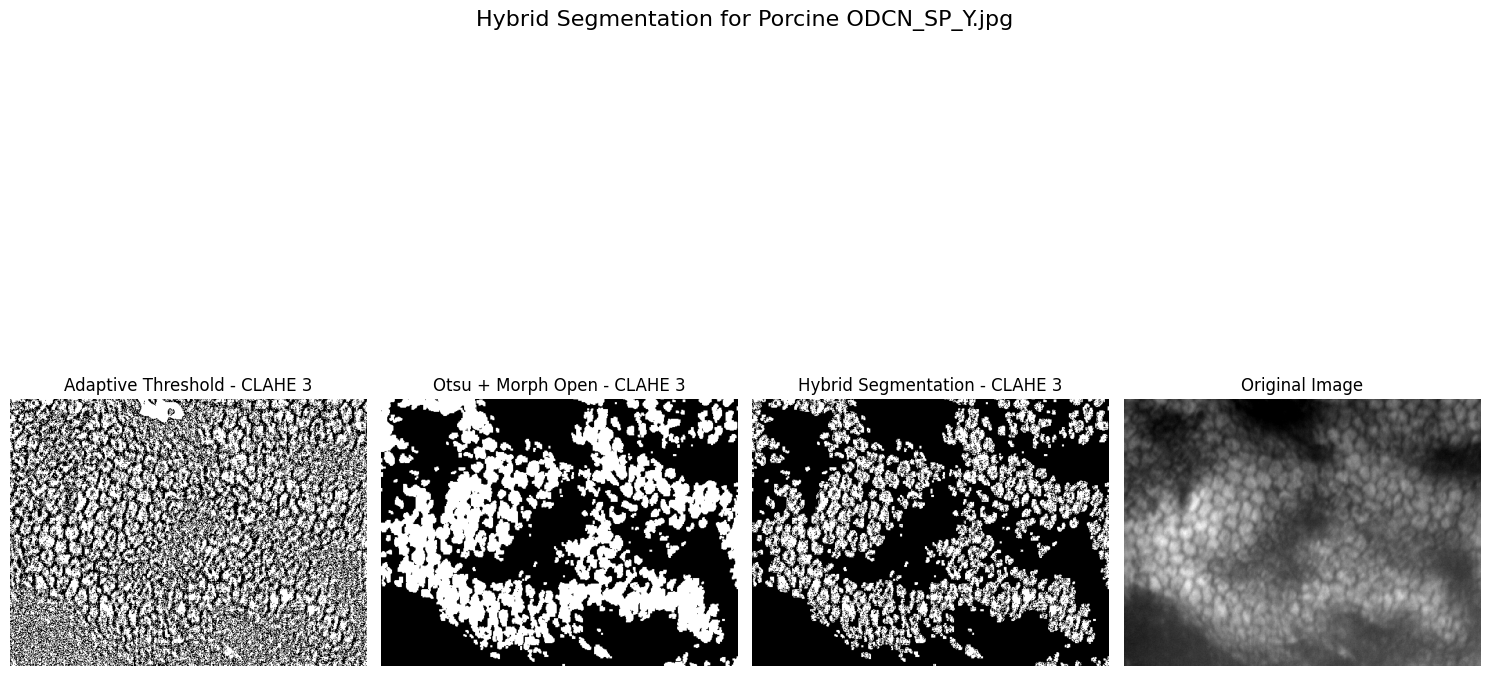

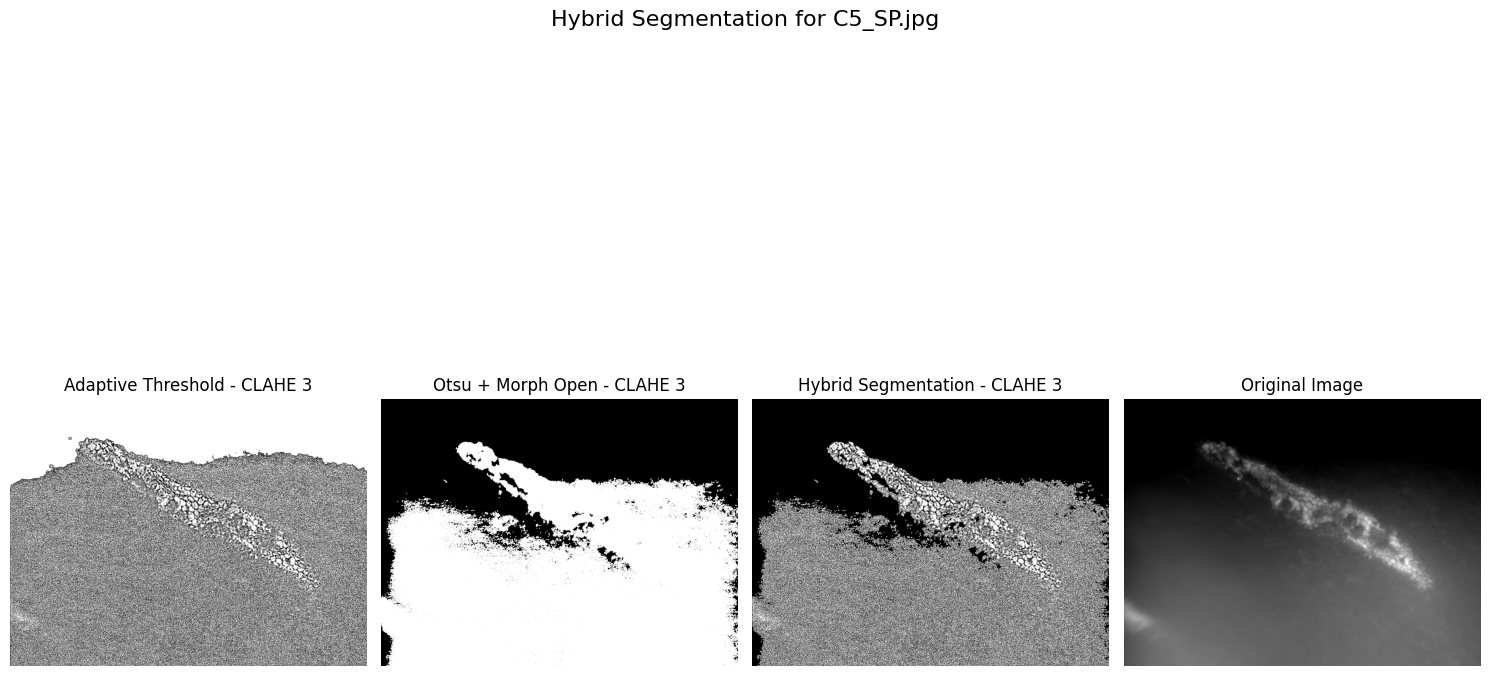

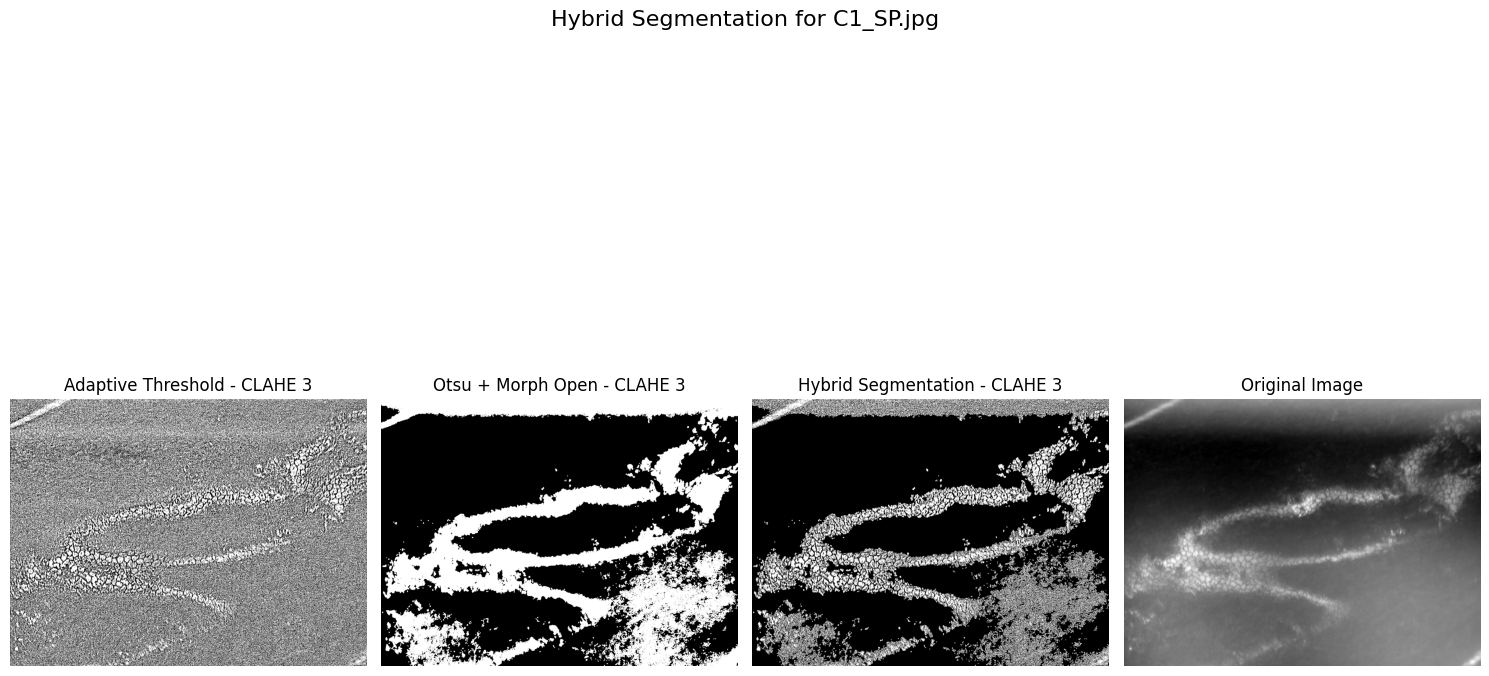

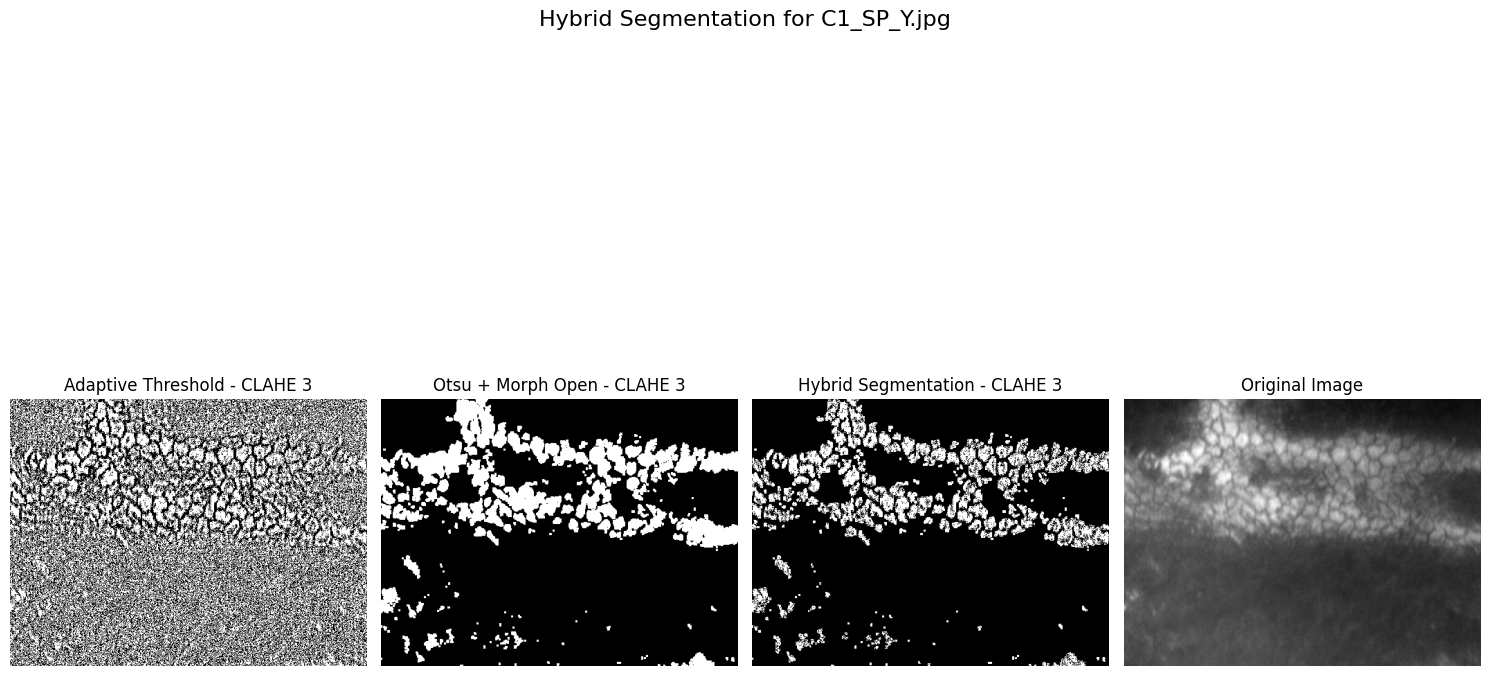

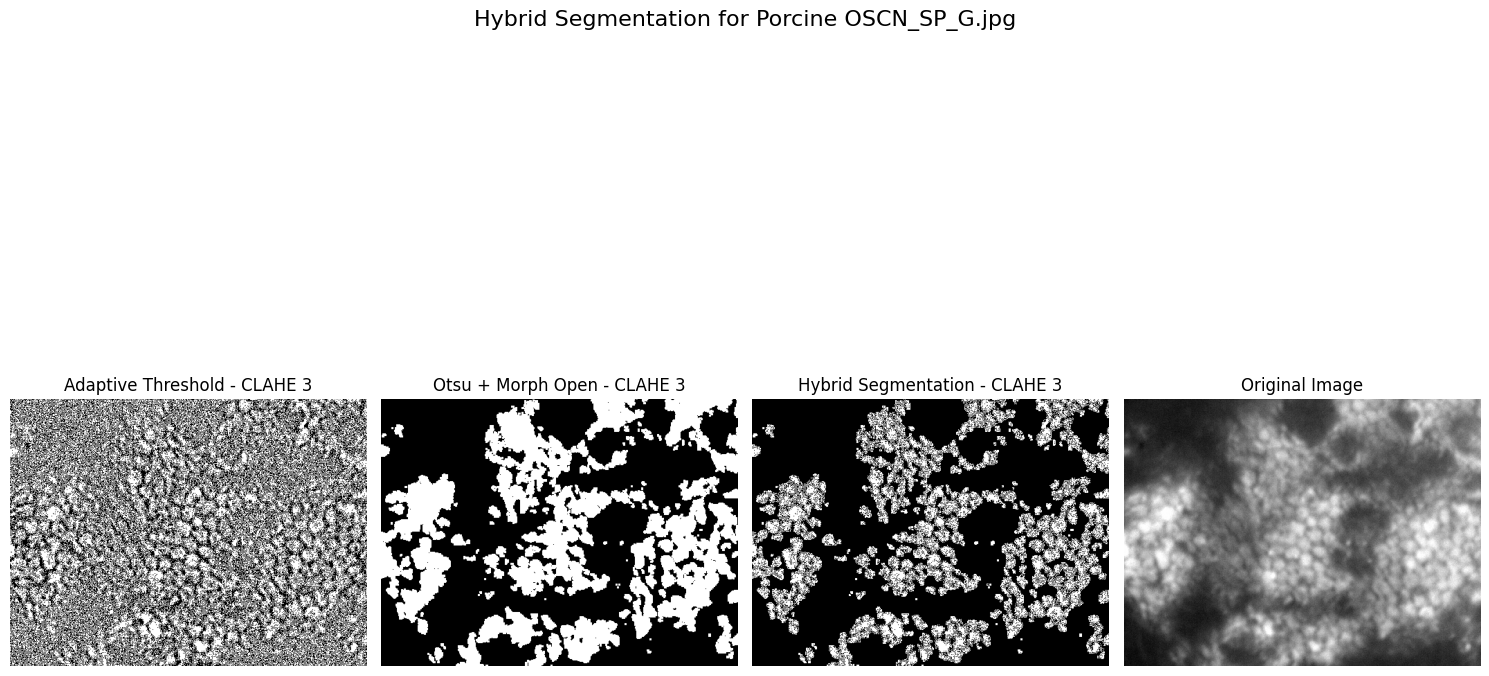

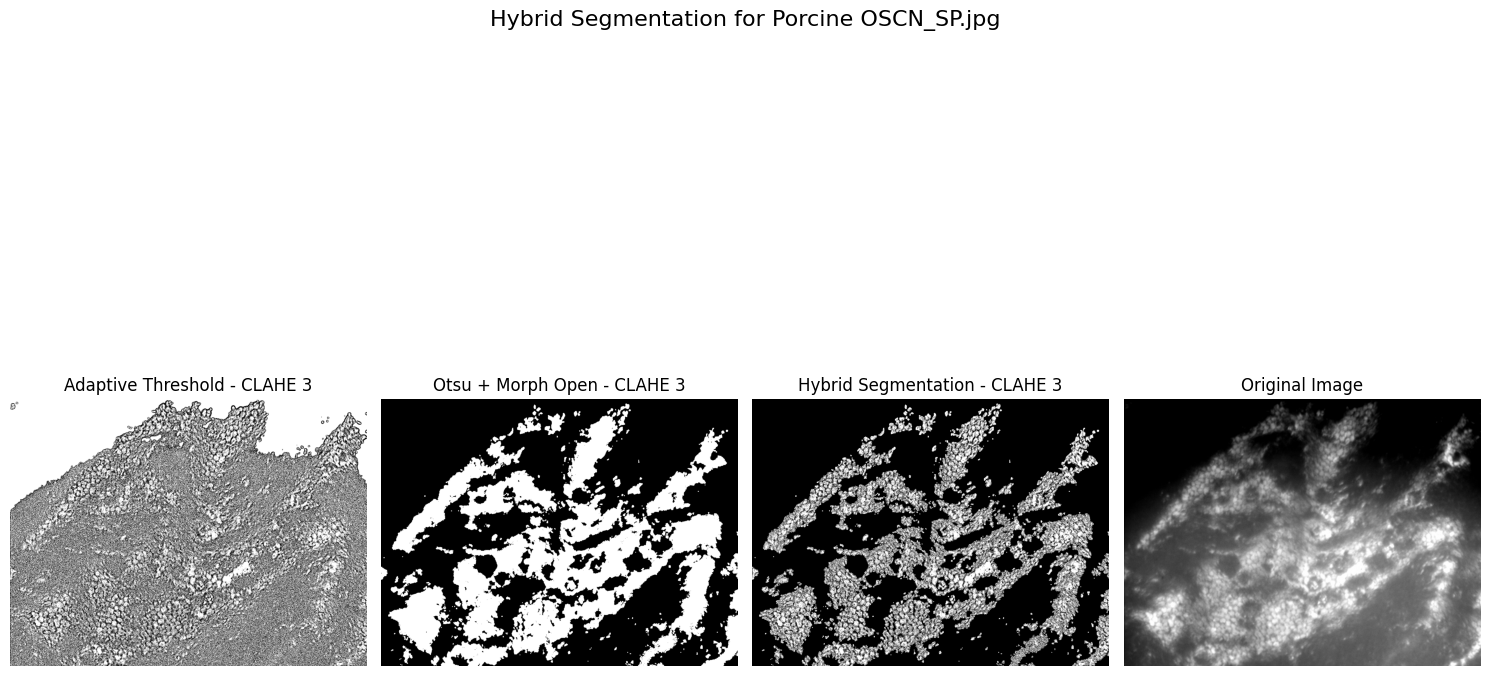

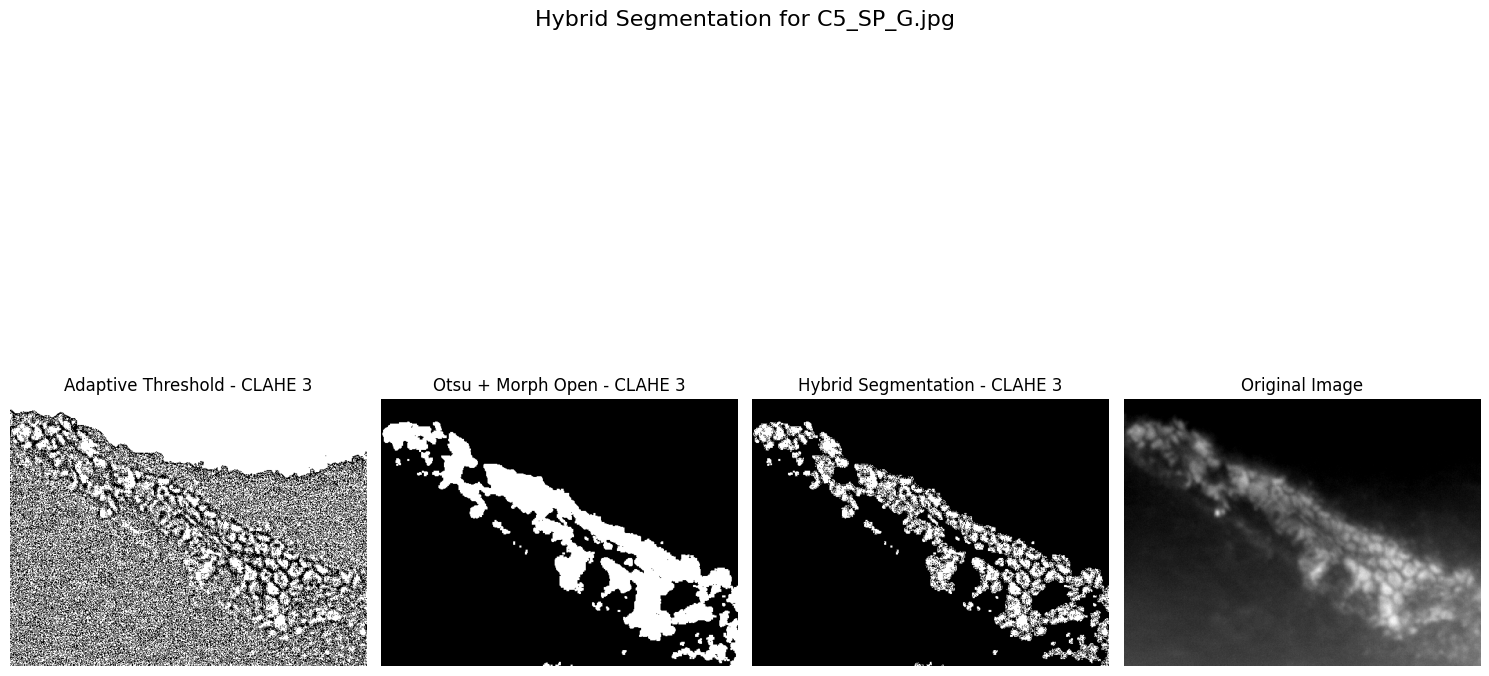

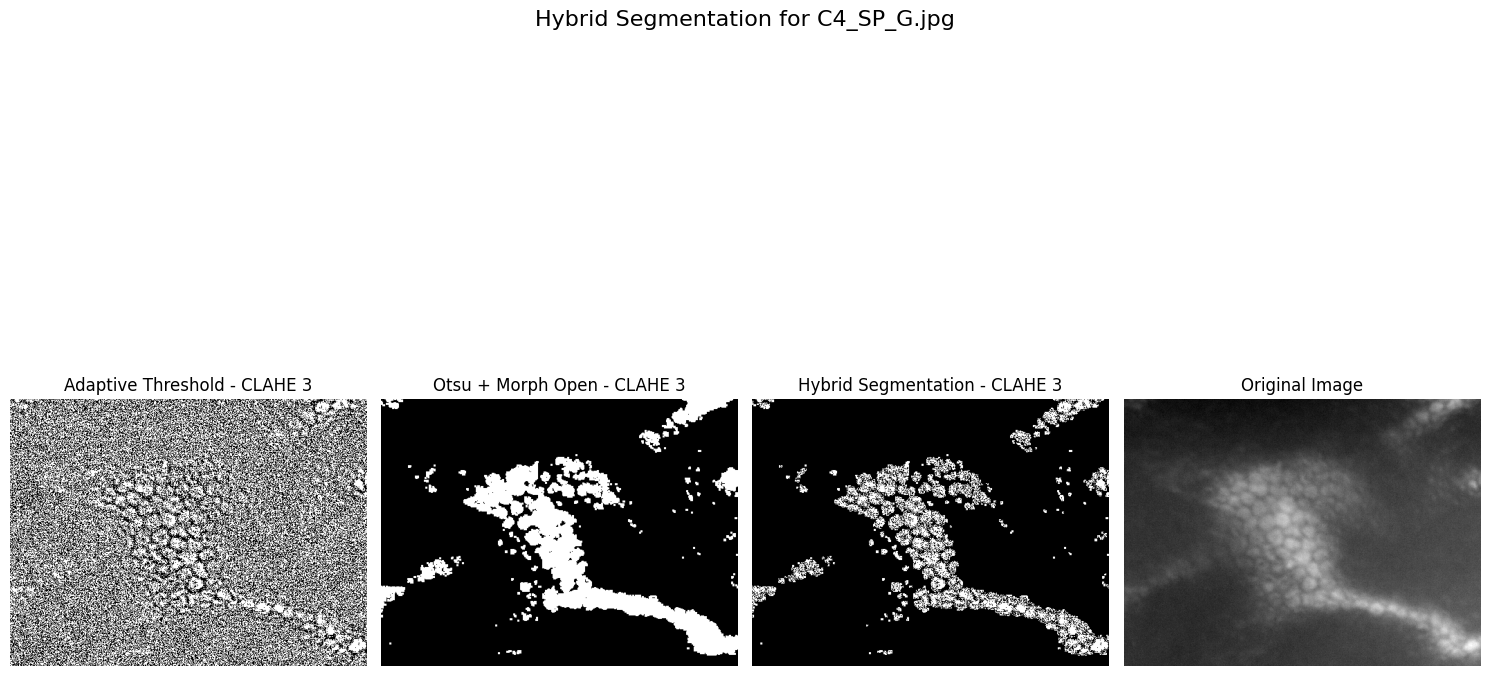

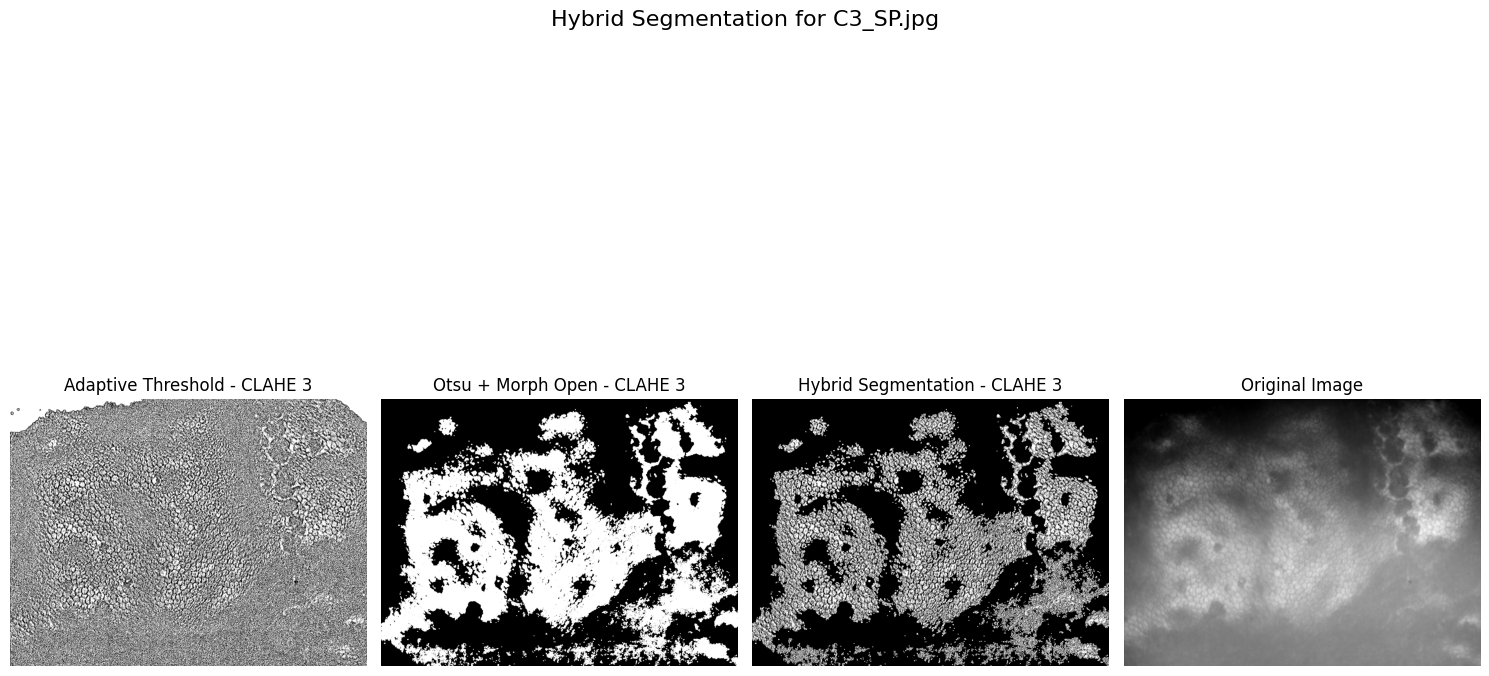

In [ ]:
# Path to images directory
image_dir = "images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg'))]

# Define CLAHE settings
clahe_3 = cv2.createCLAHE(clipLimit=3, tileGridSize=(8, 8))

# Kernel for morphological processing
kernel = np.ones((3, 3), np.uint8)

# Process each image
for file_name in image_files:
    image_path = os.path.join(image_dir, file_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Skipping {file_name}, unable to read image.")
        continue

    # Apply CLAHE (Clip Limit 2 and 3) - No Blur
    image_clahe_3 = clahe_3.apply(image)

    # 1. Adaptive Thresholding
    adaptive_3 = cv2.adaptiveThreshold(image_clahe_3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 2. Otsu's Thresholding with Morphological Opening (removes noise)
    _, otsu_3 = cv2.threshold(image_clahe_3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    otsu_3_clean = cv2.morphologyEx(otsu_3, cv2.MORPH_OPEN, kernel)

    # 3. Hybrid Segmentation: Apply Otsu’s black regions onto Adaptive
    hybrid_3 = np.where(otsu_3_clean == 0, 0, adaptive_3)

    # Display results
    fig, axes = plt.subplots(1, 4, figsize=(15, 10))
    fig.suptitle(f"Hybrid Segmentation for {file_name}", fontsize=16)

    # First row: CLAHE 3 (No Blur)
    axes[0].imshow(adaptive_3, cmap="gray")
    axes[0].set_title("Adaptive Threshold - CLAHE 3")

    axes[1].imshow(otsu_3_clean, cmap="gray")
    axes[1].set_title("Otsu + Morph Open - CLAHE 3")

    axes[2].imshow(hybrid_3, cmap="gray")
    axes[2].set_title("Hybrid Segmentation - CLAHE 3")

    axes[3].imshow(image, cmap="gray")
    axes[3].set_title("Original Image")

    # Remove axes labels for cleaner visualization
    for ax in axes.flatten():
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust title positioning
    plt.show()
